In [1]:
#import library
import pickle
import json
import datetime
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import random
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#import file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
tweet_raw.head()

,Unnamed: 0,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1,1.237891e+18,1.322252e+08,2020-03-12T00:00:00Z,SSalud_mx,¿Por qué #LavarteLasManos? Infórmate en el mic...,TweetDeck,NaN,NaN,NaN,False,False,3924,62,NaN,NaN,NaN,632579,206,NaN,2010-04-12T16:53:45Z,True,es
1,2,1.237891e+18,3.795021e+07,2020-03-12T00:00:00Z,ThaiPBS,6 ข้อดีการใช้ #หน้ากากผ้า ทางเลือกคนไม่ป่วย \r...,TweetDeck,NaN,NaN,NaN,False,False,2610,92,NaN,NaN,NaN,2786831,183,NaN,2009-05-05T15:48:26Z,True,th
2,3,1.237891e+18,1.587242e+07,2020-03-12T00:00:00Z,ABSCBNNews,Narito ang alert level na ginagamit ng Departm...,TweetDeck,NaN,NaN,NaN,False,False,1068,103,NaN,NaN,NaN,6697909,1075,NaN,2008-08-16T10:09:33Z,True,tl
3,4,1.237891e+18,8.602529e+17,2020-03-12T00:00:00Z,IMSS_SanLuis,"Con manos limpias, seguro estarás mejor. #Cinc...",TweetDeck,NaN,NaN,NaN,False,False,300,0,NaN,NaN,NaN,942,41,NaN,2017-05-04T22:00:38Z,False,es
4,5,1.237891e+18,9.217477e+07,2020-03-12T00:00:00Z,DZMMTeleRadyo,Tinanggihan ng ilang miyembro ng Kamara na isa...,TweetDeck,NaN,NaN,NaN,False,False,573,2,NaN,NaN,NaN,1336680,161,NaN,2009-11-24T02:03:16Z,True,tl


In [0]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 61kB/s 
     |████████████████████████████████| 204kB 45.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=4abdde65db01dbb254f4d5f8398295c582ba39a17746b166b3ac077fa27127c3
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.2-bin-hadoop2.7"

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.0-preview2-bin-hadoop2.7.tgz
!pip install -q findspark

spark-3.0.0-preview2-bin-hadoop2.7/
spark-3.0.0-preview2-bin-hadoop2.7/data/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/AFINN-111.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_binary_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_kmeans_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_multiclass_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_lda_libsvm_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/iris_libsvm.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pagerank_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_linear_regression_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pic_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/test.data
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/sample_movielens_rati

In [0]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop2.7"
import findspark
findspark.init()

In [0]:
import findspark
findspark.init()
import pyspark # Call this only after findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)


In [0]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

/content/spark-3.0.0-preview2-bin-hadoop2.7/python/pyspark/sql/session.py:375: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [0]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [0]:
# Download datasets directly to your Google Drive "Colab Datasets" folder

import requests

df= "/content/Spring term/20200312_Coronavirus_Tweets_Subset.CSV" 

In [0]:
tweet_raw = (spark.read.format("csv").options(header="true").load("/content/20200312_Coronavirus_Tweets_Subset.CSV"))
display(tweet_raw)
tweet_raw.show(10, False)


DataFrame[_c0: string, status_id: string, user_id: string, created_at: string, screen_name: string, text: string, source: string, reply_to_status_id: string, reply_to_user_id: string, reply_to_screen_name: string, is_quote: string, is_retweet: string, favourites_count: string, retweet_count: string, country_code: string, place_full_name: string, place_type: string, followers_count: string, friends_count: string, account_lang: string, account_created_at: string, verified: string, lang: string]

+-------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+------------------+--------------------+---------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+------------------+----------------+--------------------+--------+----------+----------------+-------------+------------+--------------------+----------+---------------+-------------+------------+--------------------+--------+----+
|_c0                                                                                                                                                          |status_id          |user_id           |created_at          |screen_name    |text                                                                                                                 

In [0]:
from pyspark.sql.functions import explode
from pyspark.sql import functions as F

In [0]:
# create a spark session
spark = SparkSession.builder\
                    .master("local")\
                    .appName("Structured Streaming")\
                    .getOrCreate()

      

In [0]:
tweets_pdf = tweet_raw.toPandas()
tweets_pdf.head(10)

,_c0,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1,1.237891051895e+18,132225222,2020-03-12T00:00:00Z,SSalud_mx,¿Por qué #LavarteLasManos? Infórmate en el mic...,TweetDeck,NA,NA,None,FALSE,FALSE,3924,62,None,None,None,632579,206,NA,2010-04-12T16:53:45Z,TRUE,es
1,2,1237891051312033792,37950212,2020-03-12T00:00:00Z,ThaiPBS,6 ข้อดีการใช้ #หน้ากากผ้า ทางเลือกคนไม่ป่วย,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,ข้อสำคัญ‼ ควรหมั่นล้างมือให้สะอาดบ่อย ๆ ด้วยน้...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,📌รู้เท่าทัน ยับยั้งการระบาด #COVID19 กับ #Thai...,TweetDeck,NA,NA,None,FALSE,FALSE,2610,92,None,None,None,2786831,183,NA,2009-05-05T15:48:26Z,TRUE,th,None,None,None,None,None
4,3,1237891051261739008,15872418,2020-03-12T00:00:00Z,ABSCBNNews,Narito ang alert level na ginagamit ng Departm...,TweetDeck,NA,NA,None,FALSE,FALSE,1068,103,None,None,None,6697909,1075,NA,2008-08-16T10:09:33Z,TRUE,tl
5,4,1237891051249184768,860252856829587456,2020-03-12T00:00:00Z,IMSS_SanLuis,"Con manos limpias, seguro estarás mejor. #Cinc...",TweetDeck,NA,NA,None,FALSE,FALSE,300,0,None,None,None,942,41,NA,2017-05-04T22:00:38Z,FALSE,es
6,5,1237891051903307776,92174767,2020-03-12T00:00:00Z,DZMMTeleRadyo,Tinanggihan ng ilang miyembro ng Kamara na isa...,TweetDeck,NA,NA,None,FALSE,FALSE,573,2,None,None,None,1336680,161,NA,2009-11-24T02:03:16Z,TRUE,tl
7,6,1237891053090418688,14605976,2020-03-12T00:00:00Z,PrensaFutbol,Se complica la Europa League: @GetafeCF no irá...,TweetDeck,NA,NA,None,FALSE,FALSE,1266,0,None,None,None,223550,32387,NA,2008-04-30T21:08:38Z,FALSE,es
8,7,1237891052109008896,91430932,2020-03-12T00:00:00Z,NewsweekEspanol,#CoronaVirusFacts I El defensa de la #Juventus...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,"https://t.co/5MH27yFI5T""",TweetDeck,NA,NA,None,FALSE,FALSE,2181,2,None,None,None,86969,813,NA,2009-11-20T21:36:41Z,TRUE,es,None,None,None,None,None


In [0]:
pd.to_datetime(tweets_pdf['created_at'],errors='coerce')
idx = pd.DatetimeIndex(pd.to_datetime(tweets_pdf['created_at'],errors='coerce'))

In [0]:
idx

DatetimeIndex(['2020-03-12 00:00:00+00:00', '2020-03-12 00:00:00+00:00',
                                     'NaT',                       'NaT',
               '2020-03-12 00:00:00+00:00', '2020-03-12 00:00:00+00:00',
               '2020-03-12 00:00:00+00:00', '2020-03-12 00:00:00+00:00',
               '2020-03-12 00:00:00+00:00',                       'NaT',
               ...
                                     'NaT', '2020-03-12 00:17:14+00:00',
               '2020-03-12 00:17:15+00:00',                       'NaT',
                                     'NaT', '2020-03-12 00:17:15+00:00',
               '2020-03-12 00:17:15+00:00', '2020-03-12 00:17:16+00:00',
                                     'NaT',                       'NaT'],
              dtype='datetime64[ns, tzlocal()]', name='created_at', length=5634, freq=None)

In [0]:
ones = np.ones(len(tweets_pdf['created_at']))
ITAvWAL = pandas.Series(ones, index=idx)
per_minute = ITAvWAL.resample('1Min').sum().fillna(0)

In [0]:
per_minute

created_at
2020-03-12 00:00:00+00:00    234.0
2020-03-12 00:01:00+00:00    184.0
2020-03-12 00:02:00+00:00    157.0
2020-03-12 00:03:00+00:00    179.0
2020-03-12 00:04:00+00:00    168.0
2020-03-12 00:05:00+00:00    162.0
2020-03-12 00:06:00+00:00    169.0
2020-03-12 00:07:00+00:00    184.0
2020-03-12 00:08:00+00:00    160.0
2020-03-12 00:09:00+00:00    162.0
2020-03-12 00:10:00+00:00    193.0
2020-03-12 00:11:00+00:00    149.0
2020-03-12 00:12:00+00:00    170.0
2020-03-12 00:13:00+00:00    179.0
2020-03-12 00:14:00+00:00    178.0
2020-03-12 00:15:00+00:00    173.0
2020-03-12 00:16:00+00:00    153.0
2020-03-12 00:17:00+00:00     46.0
dtype: float64

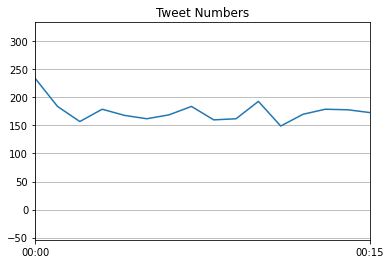

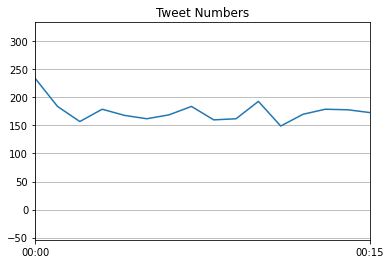

In [0]:
# The following code is to manipulate the data, and then visualize it into a time series line chart using Matplotlib. 
import sys
import pickle 
# Plotting the series
%matplotlib inline
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("Tweet Numbers")
interval = md.MinuteLocator(interval=100)
date_formatter = md.DateFormatter('%H:%M')

#Change number according to the data
datemin = dt.datetime(2020, 3, 12, 00, 00) 
datemax = dt.datetime(2020, 3, 12, 00, 15)


ax.xaxis.set_major_locator(interval) 
ax.xaxis.set_major_formatter(date_formatter) 
ax.set_xlim(datemin, datemax)
max_freq = per_minute.max()
min_freq = per_minute.min()
ax.set_ylim(min_freq-100, max_freq+100) 
ax.plot(per_minute.index, per_minute)
display(fig)